In [1]:
import json
from transformers import BertTokenizer
import random
import numpy as np

seed = 42
np.random.seed(seed)
random.seed(seed)

# 段落层次的机制检测数据生成

In [2]:
all_data = json.load(open("../ann_result/mechanism_detect_4_year.json","r"))
mechanism_data = json.load(open("../../mechan_ent_rel_ext/ann_result/ner_0730.json","r"))

In [5]:
pos_paper_ids_set = set([paper["paper_id"] for paper in mechanism_data])
len(pos_paper_ids_set)

660

In [ ]:
data = []
for paper in all_data:
    if len(paper["text"]) < 20:
        continue
    item = {
        "text":paper["text"],
        "label":0,
        "id":paper["id"]
    }
    if paper["id"] in pos_paper_ids_set:
        item["label"] = 1
    data.append(item)


# 统计摘要的长度

## 通过bert的分词器进行分词

In [8]:
import pandas as pd

tokenizer = BertTokenizer.from_pretrained("文档/pretrained_model/sci_bert_allenai")
text_len = [len(tokenizer.encode(paper["text"],add_special_tokens=False)) for paper in data]
text_len = pd.Series(text_len)

In [11]:
text_len.describe()

count    1670.000000
mean      184.784431
std        50.529624
min        46.000000
25%       150.000000
50%       183.000000
75%       216.000000
max       383.000000
dtype: float64

In [12]:
print(text_len.quantile(0.99))

307.30999999999995


<AxesSubplot:ylabel='Frequency'>

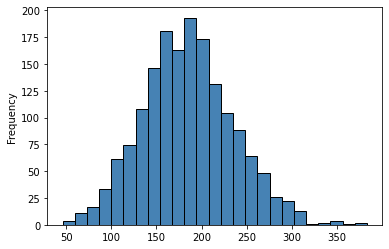

In [13]:
text_len.plot.hist(bins=25,color="steelblue",
        edgecolor="black")

# 训练数据，测试数据，验证数据划分

## 设置随机种子

In [16]:
random.shuffle(data)
len(data)

1670

## 数据拆分

In [17]:
train_data = data[335:-335]
test_data = data[:335]
dev_data = data[-335:]

In [18]:
target_dir = "../data"

保存数据

In [19]:
def save_data(saved_data,saved_name):
    json.dump(
        saved_data,open(target_dir+"/"+saved_name+".json","w",encoding="utf-8"),
        indent=2,
        ensure_ascii=False
    )
    print("save data to ",saved_name)

In [22]:
save_data(train_data,"train")
save_data(dev_data,"dev")
save_data(test_data,"test")

save data to  train
save data to  dev
save data to  test
